In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np 
import string 
import spacy
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Tweet = pd.read_csv(r'C:\Users\pv437\Desktop\Data Scince Folder\assignment\assignment downloads\ass 11/Elon_musk.csv', encoding='Latin1')
Tweet.head(5)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [3]:
Tweet =Tweet.rename(columns={'Unnamed: 0':'Index'})
Tweet.head(5)

,Index,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
Tweet.shape

(1999, 2)

In [5]:
Tweet = [Text.strip() for Text in Tweet.Text]

In [6]:
#Preprocessing the text
Tweet = [Text for Text in Tweet if Text]           
# removing the empty strings from the data
Tweet[0:1999]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [7]:
# joining the list of comments into a single text/string
text = ' '.join(Tweet)

In [8]:
len(text)

158702

In [9]:
#Removing punctuations
no_punc_text = text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

In [10]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [11]:
tokens = word_tokenize(no_punc_text)
tokens[0:1999]

['kunalb11',
 'I\x92m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 

In [12]:
len(tokens)

21078

In [13]:
#Removing Stopwords
text_stopwords = stopwords.words("english")
text_stopwords.append('an')
no_stop_words = [word for word in tokens if not word in text_stopwords]
no_stop_words[:1999]

['kunalb11',
 'I\x92m',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'Have',
 'tried',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'next',
 'even',
 'Happy',
 'New',
 'Year',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'underdoge',
 'All',
 'thought',
 'would',
 'fail',
 'Himself',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'entertaining',
 'outcome',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'Just',
 'agree',
 'Clubhouse',
 'kanyewest',
 'httpstco3rWE9uHSTS',
 'geoffkeighley',
 'UnrealEngine',
 'It\x92s',
 'getting',
 'real',
 'Bought',
 'Dogecoin',
 'lil',
 'X',
 'toddler',
 'hodler',
 'JoshManMode',
 'He',
 'definitely',
 'issues',
 'se

In [14]:
#Normalizing the text(converting all the text to lower case)
lower_words = [text.lower() for text in no_stop_words]
lower_words[0:1999]

['kunalb11',
 'i\x92m',
 'alien',
 'idaacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tried',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera27',
 'doge',
 'underestimated',
 'teslacn',
 'congratulations',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'httpstco9wfkmyu2oj',
 'frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'httpstcozgxjfdzzrm',
 'owensparks',
 'flcnhvy',
 'anonyx10',
 'haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'indeed',
 'tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'givedirectly',
 'just',
 'sent',
 'just',
 'agree',
 'clubhouse',
 'kanyewest',
 'httpstco3rwe9uhsts',
 'geoffkeighley',
 'unrealengine',
 'it\x92s',
 'getting',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'joshmanmode',
 'he',
 'definitely',
 'issues',
 'se

In [15]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stem_words = [ps.stem(word) for word in lower_words]
stem_words[0:1999]

['kunalb11',
 'i\x92m',
 'alien',
 'idaacarmack',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'tri',
 'joerogan',
 'spotifi',
 'great',
 'interview',
 'gtera27',
 'doge',
 'underestim',
 'teslacn',
 'congratul',
 'tesla',
 'china',
 'amaz',
 'execut',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happi',
 'new',
 'year',
 'ox',
 'httpstco9wfkmyu2oj',
 'frodo',
 'underdog',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'httpstcozgxjfdzzrm',
 'owenspark',
 'flcnhvi',
 'anonyx10',
 'haha',
 'thank',
 'flcnhvi',
 'anonyx10',
 'inde',
 'tweet',
 'definit',
 'repres',
 'realworld',
 'time',
 'alloc',
 'the',
 'entertain',
 'outcom',
 'like',
 'givedirectli',
 'just',
 'sent',
 'just',
 'agre',
 'clubhous',
 'kanyewest',
 'httpstco3rwe9uhst',
 'geoffkeighley',
 'unrealengin',
 'it\x92',
 'get',
 'real',
 'bought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'joshmanmod',
 'he',
 'definit',
 'issu',
 'sentenc',
 'seem',
 'bit',
 'high',
 'freewalletorg',
 'than

In [16]:
#Lemmatization
nlp = spacy.load("en_core_web_sm")


In [17]:
# joining the stopwords into a paragraph
doc = nlp(' '.join(no_stop_words))
doc[0:1999]

kunalb11 Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco9WFKMYu2oj Frodo underdoge All thought would fail Himself httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely represent realworld time allocation The entertaining outcome likely GiveDirectly Just sent Just agree Clubhouse kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine Its getting real Bought Dogecoin lil X toddler hodler JoshManMode He definitely issues sentencing seems bit high freewalletorg Thanks fixing freewalletorg Please unlock account AstroJordy U0001F923U0001F923 This true power haha httpstcoFc9uhQSd7O freewalletorg Any crypto wallet wont give private keys avoided costs freewalletorg Your app sucks RT SpaceX NASA selected Falcon Heavy launch first two elements lunar Gateway togeth

In [18]:
lemmas = [token.lemma_ for token in doc]
lemmas[:1999]

['kunalb11',
 'I\x92m',
 'alien',
 'IDAACarmack',
 'Ray',
 'trace',
 'Cyberpunk',
 'HDR',
 'nextlevel',
 'have',
 'try',
 'joerogan',
 'spotify',
 'great',
 'interview',
 'gtera27',
 'Doge',
 'underestimate',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'Happy',
 'New',
 'Year',
 'Ox',
 'httpstco9wfkmyu2oj',
 'Frodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'httpstcozgxjfdzzrm',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thanks',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'the',
 'entertaining',
 'outcome',
 'likely',
 'GiveDirectly',
 'just',
 'send',
 'just',
 'agree',
 'Clubhouse',
 'kanyewest',
 'httpstco3rWE9uHSTS',
 'geoffkeighley',
 'UnrealEngine',
 'It\x92s',
 'get',
 'real',
 'buy',
 'Dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'JoshManMode',
 'he',
 'definitely',
 'issue',
 'sentencing',
 '

In [19]:
#POS tagging¶
one_block = Tweet[200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [20]:
# getting the tokens and pos tags for the tokens
for tokens in doc_block[0:1999]:
    print(tokens,tokens.pos_)

RT PROPN
@SpaceX PROPN
: PUNCT
Falcon PROPN
9s ADV
first ADJ
stage NOUN
has AUX
landed VERB
on ADP
the DET
Of ADV
Course ADV
I PRON
Still ADV
Love VERB
You PRON
droneship NOUN
https://t.co/6gWWlLiXdG NOUN


In [21]:
# extracting the nouns and verbs
noun_verbs = [token.text for token in doc_block if token.pos_ in ("NOUN","VERB")]
print(noun_verbs[0:1999])

['stage', 'landed', 'Love', 'droneship', 'https://t.co/6gWWlLiXdG']


In [22]:
# getting the word count
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(noun_verbs)
sum_words = X.sum(axis = 0)
word_freq = [(word, sum_words[0,idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
wf_df= pd.DataFrame(word_freq)
wf_df.columns = ['words', 'count']
wf_df[0:1999]

,words,count
0,stage,1
1,landed,1
2,love,1
3,droneship,1
4,https,1
5,co,1
6,6gwwllixdg,1


# vectorizer = CountVectorizer()
X = vectorizer.fit_transform(noun_verbs)
sum_words = X.sum(axis = 0)
word_freq = [(word, sum_words[0,idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key = lambda x: x[1], reverse = True)
wf_df= pd.DataFrame(word_freq)
wf_df.columns = ['words', 'count']
wf_df[0:1999]

<AxesSubplot:title={'center':'Nouns and Verbs'}, xlabel='words'>

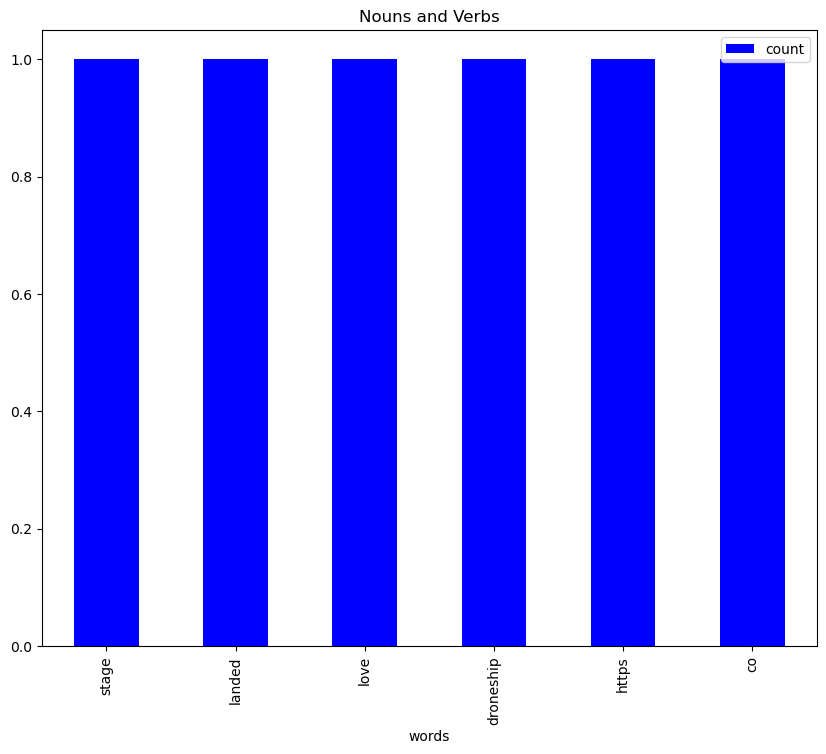

In [23]:
wf_df[0:6].plot.bar(x = 'words', title = 'Nouns and Verbs', figsize = (10,8),color = 'blue')

In [24]:
#Sentiment Analysis
afinn = pd.read_csv(r'C:\Users\pv437\Desktop\Data Scince Folder\assignment\assignment downloads\ass 11\sentiment\Afinn.csv', encoding='Latin1')
afinn.head(5)

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [25]:
afinn.shape

(2477, 2)

In [26]:
from itertools import islice
def take(n,iterable):
    return list(islice(iterable, n))

In [27]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [28]:
take(15,affinity_scores)

['abandon',
 'abandoned',
 'abandons',
 'abducted',
 'abduction',
 'abductions',
 'abhor',
 'abhorred',
 'abhorrent',
 'abhors',
 'abilities',
 'ability',
 'aboard',
 'absentee',
 'absentees']

In [29]:
from nltk import tokenize

In [30]:
sentence = tokenize.sent_tokenize(' '.join(Tweet))
sentence[0:1999]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [31]:
sent_df = pd.DataFrame(sentence, columns = ['sentences'])
sent_df

,sentences
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [32]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

In [33]:
def calculate_sentiment(text: str = None)->float:
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [34]:
calculate_sentiment("never poor")

-2

In [35]:
# Getting the word count from sentences
sent_df['word_count'] = sent_df['sentences'].str.split().apply(len)
sent_df['word_count'].head(1999)

0      13
1       4
2       4
3      13
4       8
       ..
919    11
920    31
921     3
922    47
923    15
Name: word_count, Length: 924, dtype: int64

In [36]:
sent_df['sentiment_scores'] = sent_df['sentences'].apply(calculate_sentiment)
sent_df

,sentences,word_count,sentiment_scores
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,13,0
1,Have you tried it?,4,0
2,@joerogan @Spotify Great interview!,4,3
3,@gtera27 Doge is underestimated @teslacn Congr...,13,3
4,Now on to the next for even more!!,8,0
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",11,0
920,"It may never pay out, as the stock cant b ht...",31,-4
921,Details Aug 28.,3,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,47,-2


In [37]:
sent_df.sort_values(by = 'sentiment_scores').tail(20)

,sentences,word_count,sentiment_scores
595,@ARKInvest @aurmanARK Good analysis @PPathole ...,20,9
704,New Roadster w https://t.co/ukLy4Dwqur @david...,30,9
123,It isnt enough to be safer than human drivers...,51,9
652,"Its not useful for predicting the future, nor...",118,9
844,Giving each person money allows them to decid ...,49,9
490,Gives a false sense of https://t.co/aIGaEnC8f...,41,10
855,Impressive Tianwen-1 Mars rover mission launch...,102,10
530,@TeslaClubIN @WholeMarsBlog @MKBHD Next year f...,121,10
183,Theres some great AI out ther https://t.co/v...,48,10
151,"@GUNMTLM3 @lexfridman No, but definitely this ...",45,10


In [38]:
sent_df['sentiment_scores'].describe()

count    924.000000
mean       1.352814
std        2.692026
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_scores, dtype: float64

In [39]:
sent_df[sent_df['sentiment_scores']>=15]

,sentences,word_count,sentiment_scores
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",231,16
105,@Erdayastronaut @SpaceX Was also thinking that...,94,16
719,We just havent observed the https://t.co/mez...,72,17


In [40]:
sent_df[sent_df['sentiment_scores']<0]

,sentences,word_count,sentiment_scores
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,14,-2
11,"However, if we don https://t.co/9Z8Ac6skqx @R...",40,-2
16,Thats what youre missing.,4,-2
23,https://t.co/UEEocOfcTb The people have spoken...,37,-3
47,Would be better to have small fees than no fee...,48,-2
...,...,...,...
886,This is primarily an electrical/electronic (ch...,69,-2
887,Will those who write the algorithms ever reali...,11,-3
894,No expert installer required.,4,-1
920,"It may never pay out, as the stock cant b ht...",31,-4


<AxesSubplot:xlabel='sentiment_scores', ylabel='Density'>

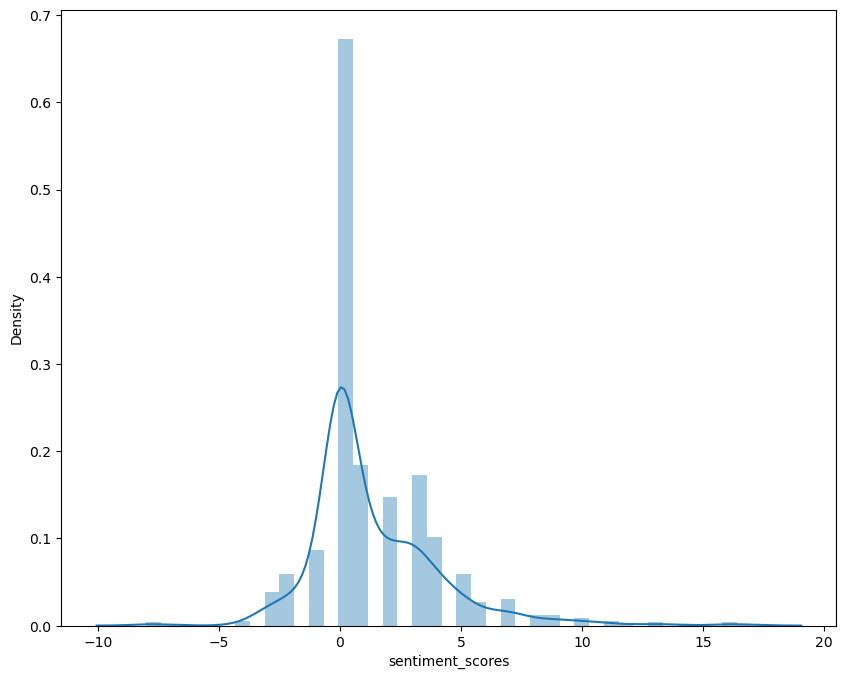

In [41]:
# Visualizing the sentiment scores
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize = (10,8))
sns.distplot(sent_df['sentiment_scores'])

<AxesSubplot:ylabel='sentiment_scores'>

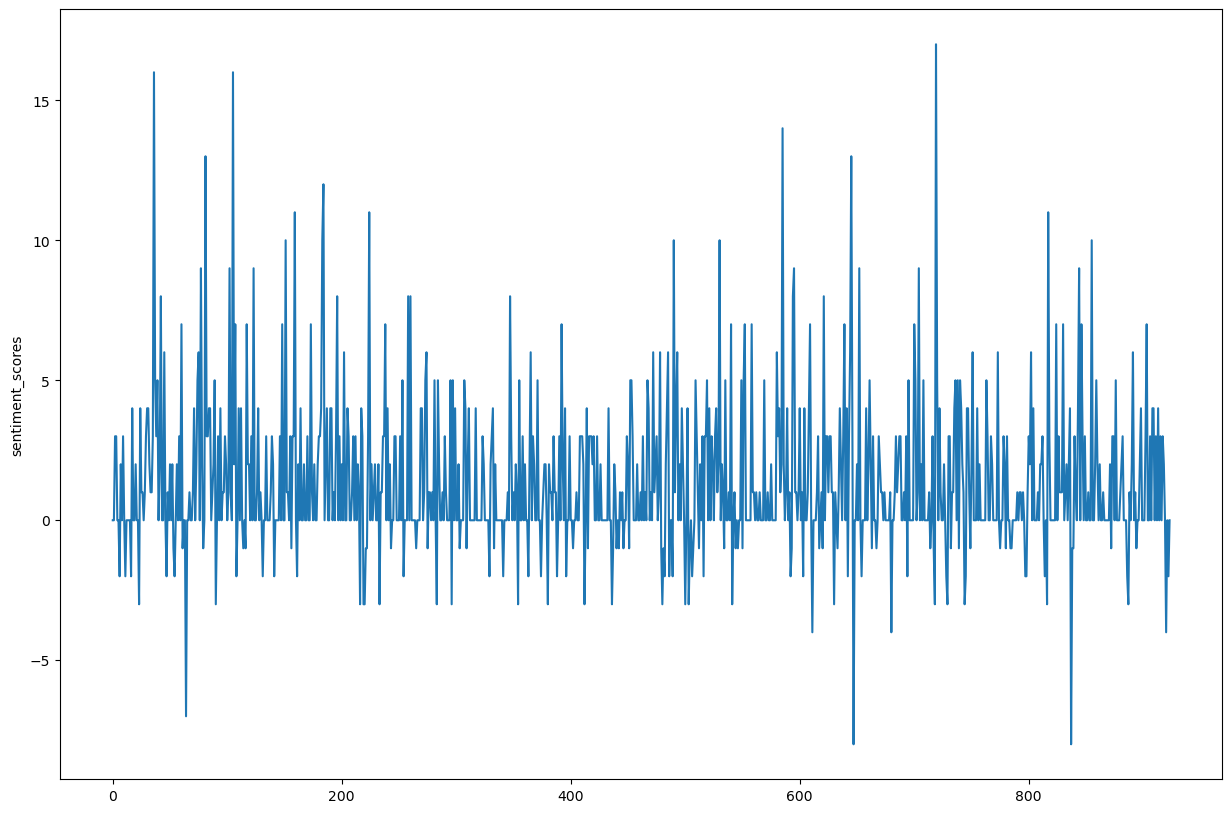

In [42]:
plt.figure(figsize=(15,10))
sns.lineplot(x = sent_df.index, y = sent_df['sentiment_scores'], data = sent_df)

In [43]:
string = " ".join(sent_df["sentences"])

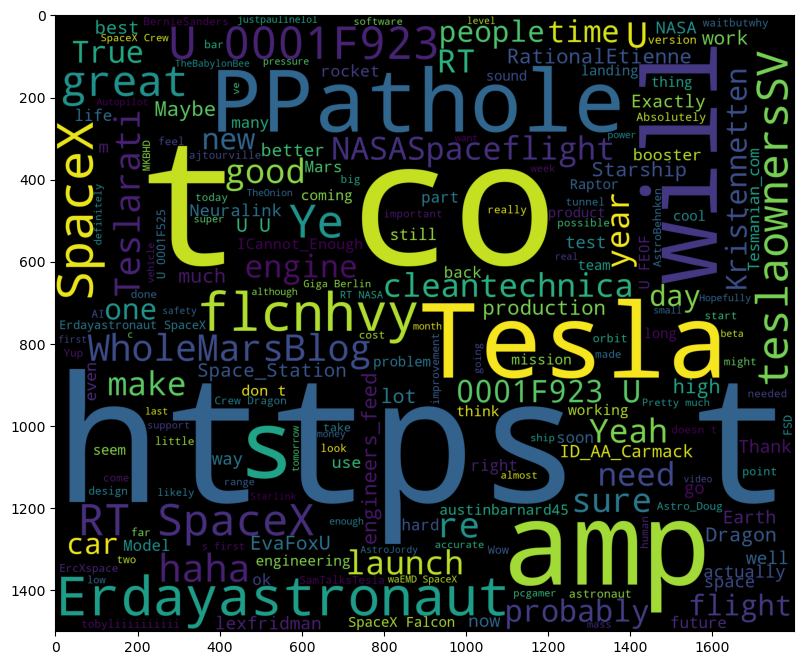

In [44]:
from wordcloud import WordCloud
plt.figure(figsize = (15,8))
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string)
plt.imshow(wordcloud_stw)